In [182]:
import pandas_profiling as ProfileReport
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import heapq
import time
import seaborn as sns

STC_file= pd.read_csv('stc- Jawwy TV Data Set_T1_copy.csv',encoding='latin1')

### Welcome Messege

In [183]:
print('\nHello! Let\'s explore some STC JAWWY TV data!\n')


Hello! Let's explore some STC JAWWY TV data!



### Loading Data

In [184]:
STC_file= pd.read_csv('stc- Jawwy TV Data Set_T1_copy.csv',encoding='latin1')
STC_file.head()

,ï»¿Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,27/05/2017,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,21/05/2017,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,10/08/2017,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,26/07/2017,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,07/07/2017,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [185]:
print('\nHello! Let\'s explore some STC JAWWY TV data!\n')


Hello! Let's explore some STC JAWWY TV data!



### Drop Columns

In [186]:
STC_file.drop(['program_name', 'program_desc'], axis = 1, inplace = True)

### Duplicates

In [187]:
STC_file.duplicated
STC_file = STC_file.drop_duplicates()
STC_file.shape

(1048466, 11)

### Rename Columns

In [188]:
STC_file = STC_file.rename(columns={"date_":"Date","user_id_maped":"User ID","program_name":"Program Name","duration_seconds":"Duration Seconds","program_class":"Type",
"season":"Season","episode":"Episode","program_genre":"Genre","series_title":"Series Title","hd":"HD","original_name":"Name"})

### Set Time

In [189]:
STC_file['Date'] = pd.to_datetime(STC_file['Date'])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/05/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '21/05/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26/07/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19/08/2017' in DD/MM/YYYY format. Provide format or specif

### EDA

In [190]:
print(STC_file.head())
nan_count = STC_file.isna().sum().sum()
print('NaN Values = ',nan_count)
print('Shipe is ',STC_file.shape)
print(STC_file.dtypes)
STC_file.duplicated

   ï»¿Column1       Date  User ID  Duration Seconds   Type  Season  Episode  \
0           1 2017-05-27    26138                40  MOVIE       0        0   
1           3 2017-05-21     7946                17  MOVIE       0        0   
2           4 2017-10-08     7418                 8  MOVIE       0        0   
3           5 2017-07-26    19307                76  MOVIE       0        0   
4           7 2017-07-07    15860                87  MOVIE       0        0   

       Genre  Series Title  HD                  Name  
0      Drama             0   0            100 treets  
1  Animation             0   1                 Moana  
2  Animation             0   1  The Mermaid Princess  
3  Animation             0   1  The Mermaid Princess  
4  Biography             0   1             Churchill  
NaN Values =  0
Shipe is  (1048466, 11)
ï»¿Column1                   int64
Date                datetime64[ns]
User ID                      int64
Duration Seconds             int64
Type           

<bound method DataFrame.duplicated of          ï»¿Column1       Date  User ID  Duration Seconds             Type  \
0                 1 2017-05-27    26138                40            MOVIE   
1                 3 2017-05-21     7946                17            MOVIE   
2                 4 2017-10-08     7418                 8            MOVIE   
3                 5 2017-07-26    19307                76            MOVIE   
4                 7 2017-07-07    15860                87            MOVIE   
...             ...        ...      ...               ...              ...   
1048461     1247848 2017-04-22    23716              4865            MOVIE   
1048462     1247849 2017-11-29     1776              1261  SERIES/EPISODES   
1048463     1247850 2017-06-15     1918                 6  SERIES/EPISODES   
1048464     1247851 2017-11-09    25737                72            MOVIE   
1048465     1247852 2017-02-05    19844              2685            MOVIE   

         Season  Episode 

## Top 5 TV Shows Genre in Number of Content 

In [191]:
cat_5 = STC_file.groupby('Genre')['Type'].apply(lambda x: (x=='SERIES/EPISODES').sum()).reset_index(name='count')
cat_5 = cat_5.sort_values(by='count', ascending=False)
cat_5.head(5)

,Genre,count
2,Animation,252501
7,Drama,103739
4,Comedy,67553
0,Action,62255
9,Horror,35045


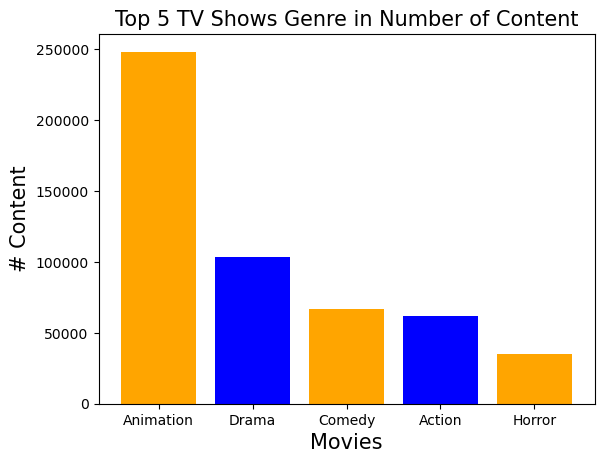

In [192]:
Genre = ['Animation', 'Drama', 'Comedy', 'Action', 'Horror']
count  = [248225, 103280, 67132, 61727, 34881]
colors = ['orange','blue']

plt.bar(Genre, count, color= colors)
plt.title('Top 5 TV Shows Genre in Number of Content',fontsize = 15)
plt.xlabel('Movies',fontsize = 15)
plt.ylabel('# Content',fontsize = 15)

plt.show()

### Top 5 Most Watched TV Shows Seasons

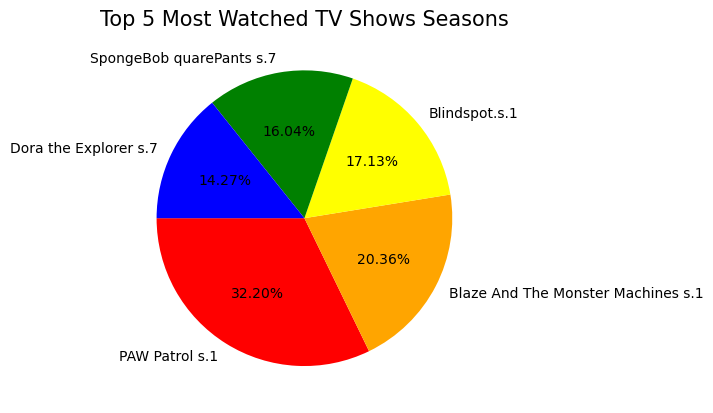

In [193]:
tv_show = STC_file.groupby(['Name','Season'])['Duration Seconds'].sum().sort_values(ascending=False)
tv_show.head(5)



Name = ['PAW Patrol s.1','Blaze And The Monster Machines s.1','Blindspot.s.1','SpongeBob quarePants s.7','Dora the Explorer s.7']
sizes = [ 32217715,20368166,17140859,16043246,14276717]
colors = ['RED','ORANGE','YELLOW','GREEN', 'BLUE']
plt.title('Top 5 Most Watched TV Shows Seasons',fontsize = 15)
plt.pie(sizes,labels=Name, autopct='%1.2f%%', colors =colors,  startangle=180, radius=1)

plt.show()

### Number of Views for Movies and TV Shows 

### عدد المشاهدات للأفلام والمسلسلات بحسب السنة

In [194]:
#group the data by year
STC_file['Year'] = STC_file['Date'].dt.year

#group the data by year and type
views_by_year_type = STC_file.groupby(['Year','Type'])['Duration Seconds'].sum()

#unstack the data to make it more readable 
views_by_year_type = views_by_year_type.unstack()

#rename the columns 
views_by_year_type.columns = ['MOVIES', 'TV SHOWS']

print(views_by_year_type)



         MOVIES   TV SHOWS
Year                      
2017  293004984  652076415
2018   79329241  266275620


### Number of Views For Top Five Genres Per Year

### عدد المشاهدات لأكثر خمسة أنواع بحسب السنة

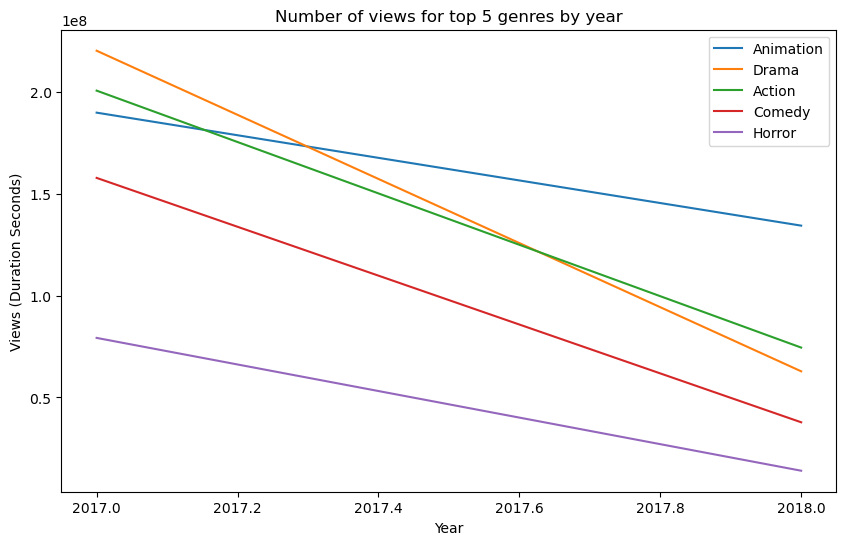

In [195]:
# group the data by the year and genre 
views_by_year_genre = STC_file.groupby(['Year','Genre'])['Duration Seconds'].sum()

# unstack the data so it's easier to read
views_by_year_genre = views_by_year_genre.unstack()

# choose the top 5 genres to focus on
top_5_genres = views_by_year_genre.sum().sort_values(ascending=False).head(5).index

# filter the dataframe to only include the top 5 genres
views_by_year_genre = views_by_year_genre[top_5_genres]

# create a line chart
fig, ax = plt.subplots(figsize=(10,6))
for genre in views_by_year_genre.columns:
    ax.plot(views_by_year_genre.index, views_by_year_genre[genre], label=genre)

plt.xlabel('Year')
plt.ylabel('Views (Duration Seconds)')
plt.title('Number of views for top 5 genres by year')
plt.legend()
plt.show()

### Average Duration of Episodes for Each Genre In Minute

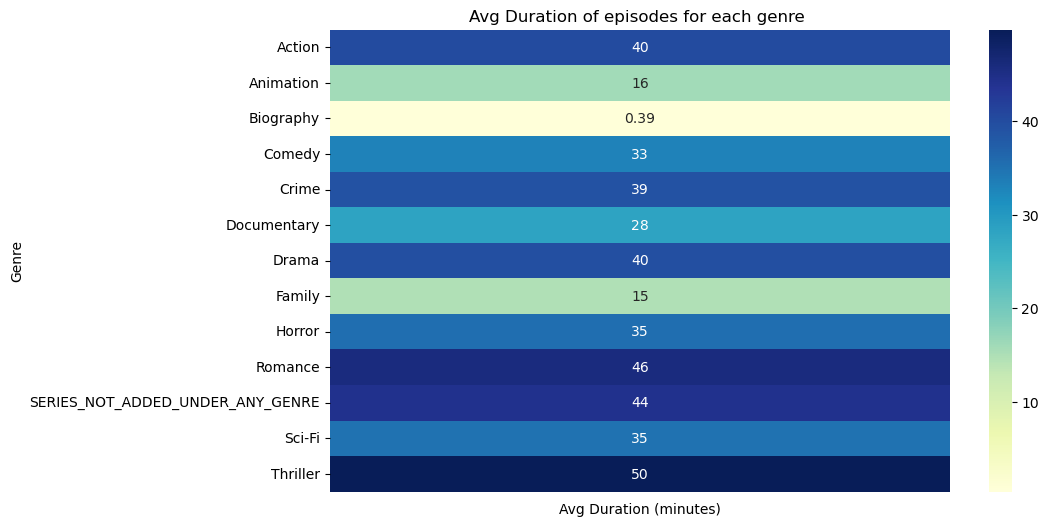

In [196]:

avg_duration_by_genre = STC_file[STC_file['Type'] == 'SERIES/EPISODES'].groupby('Genre')['Duration Seconds'].mean()/60

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(avg_duration_by_genre.values.reshape(-1,1), cmap='YlGnBu', annot=True, xticklabels=False, yticklabels=avg_duration_by_genre.index)
plt.title('Avg Duration of episodes for each genre ')
plt.xlabel('Avg Duration (minutes)')
plt.ylabel('Genre')
plt.show()


In [197]:
movies_lest=STC_file.where(STC_file['Type'] == 'MOVIE').dropna()
uniq_movie_names=movies_lest['Name'].unique()
uniq_movie_names2=[]
i = 0
for i in range(30):
    
    uniq_movie_names2.append(uniq_movie_names[i])

print(uniq_movie_names2)



['100 treets', 'Moana', 'The Mermaid Princess', 'Churchill', 'Beavis And Butt-Head Do America', 'Coco', 'Kidnap', 'The Accountant', 'The Birth of a Nation', 'The Amazing pider-Man', 'Baywatch', 'Alien: Covenant', 'Going in tyle', 'Kingsman: The Golden Circle', 'Billy Elliot the Musical Live', 'Pitch Perfect', "Surf's Up : WaveMania", 'Sully', 'Goat', 'Last Knights', 'Land Of The Dead', 'Geostorm', 'Trolls', 'Inside', 'Underworld: Awakening', 'American niper', 'Game of Aces', 'Extraterrestrial', 'Lego DC uper Hero Girls: Brain Drain', 'The Jetsons & WWE: Robo-WrestleMania!']


In [198]:
movie_time_dic = {}

for movie in uniq_movie_names2:
    movie_lest = STC_file.where(STC_file['Name'] == movie).dropna()
    time=0
    for x in  movie_lest['Duration Seconds']:
        time+=x
    movie_time_dic.update({movie:time})

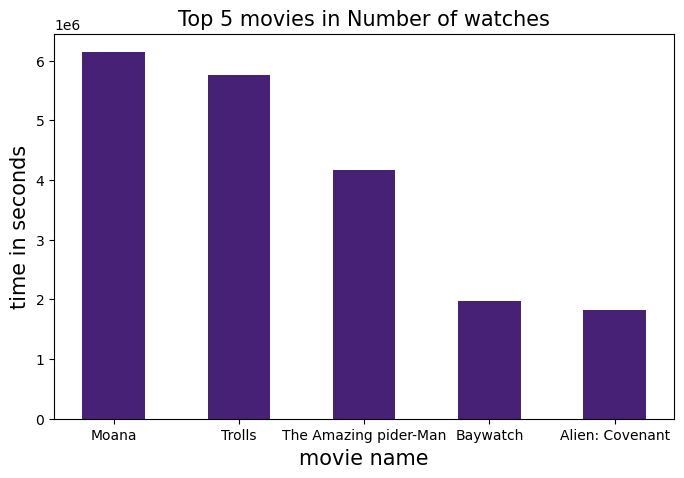

In [199]:
list_of_top_5_movies_name=heapq.nlargest(5, movie_time_dic, key=movie_time_dic.get)
list_of_top_5_movies_time=[]

for movie in list_of_top_5_movies_name:
    list_of_top_5_movies_time.append(int(movie_time_dic[movie]))
plt.figure(figsize=(8, 5))
plt.bar(list_of_top_5_movies_name, list_of_top_5_movies_time,color='#472176',width=0.5) 
plt.xlabel('movie name',fontsize = 15)
plt.ylabel('time in seconds',fontsize = 15)
plt.title('Top 5 movies in Number of watches',fontsize = 15)
plt.show()


In [200]:
movies_type_lest=movies_lest['Genre'].unique()

movie_type_and_number={}

for movie_type in movies_type_lest:
    movies_type_table=STC_file.where(STC_file['Genre'] == movie_type).dropna()
    uniq_movies_lest=movies_type_table['Name'].unique()
    movie_type_and_number.update({movie_type:len(uniq_movies_lest)})
    
print(movie_type_and_number)

{'Drama': 378, 'Animation': 252, 'Biography': 41, 'Action': 472, 'Comedy': 360, 'Horror': 105, 'NOT_DEFINED_IN_UMS': 1, 'Crime': 11, 'Thriller': 111, 'Documentary': 28, 'Family': 37, 'Adventure': 4}


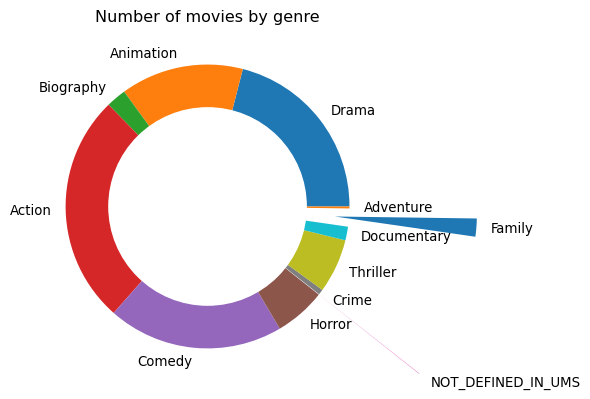

In [201]:

plt.figure(dpi=96)
plt.pie(movie_type_and_number.values(), labels=movie_type_and_number.keys(),explode=[0,0,0,0,0,0,0.9,0,0,0,0.9,0])
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Number of movies by genre')
plt.show()

In [202]:
movies_HD_table=movies_lest.where(STC_file['HD'] ==1).dropna()
movies_SD_table=movies_lest.where(STC_file['HD'] ==0).dropna()
TV_show_table=STC_file.where(STC_file['Type'] == 'SERIES/EPISODES').dropna()
TV_show_HD_table=TV_show_table.where(STC_file['HD'] ==1).dropna()
TV_show_SD_table=TV_show_table.where(STC_file['HD'] ==0).dropna()

In [203]:
lest_sd_hd=['movie','TV show']
lest_hd_numbers=[len(movies_HD_table['Name'].unique()),len(TV_show_HD_table['Name'].unique())]
lest_SD_numbers=[len(movies_SD_table['Name'].unique()),len(TV_show_SD_table['Name'].unique())]

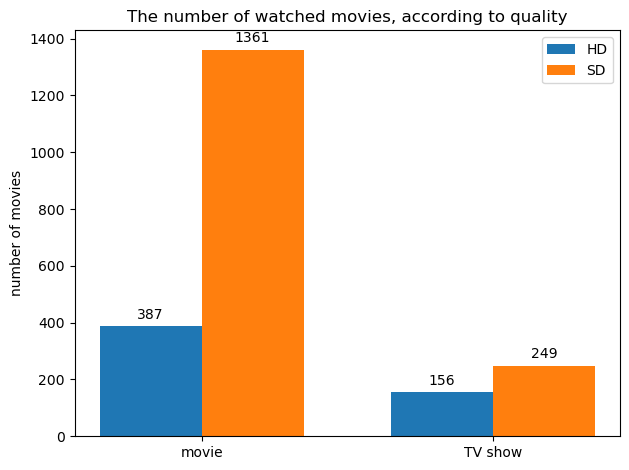

<Figure size 900x600 with 0 Axes>

In [204]:

x = np.arange(len(lest_sd_hd))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lest_hd_numbers, width, label='HD')
rects2 = ax.bar(x + width/2, lest_SD_numbers, width, label='SD')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of movies')
ax.set_title('The number of watched movies, according to quality')
ax.set_xticks(x, lest_sd_hd)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
plt.figure(figsize=(9, 6))
fig.tight_layout()
plt.show()

In [205]:
len(movies_HD_table['Name'].unique())

387

In [206]:
STC_file['Date'] = pd.to_datetime(STC_file['Date'])

filtered_df_2017 = STC_file.loc[(STC_file['Date'] >= '2017/01/01')
                     & (STC_file['Date'] <= '2017/12/31')]

movies_type_lest=movies_lest['Genre'].unique()

movie_type_and_number_2017={}

for movie_type in movies_type_lest:
    movies_type_table=filtered_df_2017.where(filtered_df_2017['Genre'] == movie_type).dropna()
    uniq_movies_lest=movies_type_table['Name'].unique()
    movie_type_and_number_2017.update({movie_type:len(uniq_movies_lest)})

del(movie_type_and_number_2017['NOT_DEFINED_IN_UMS'])
print(movie_type_and_number_2017)


{'Drama': 348, 'Animation': 228, 'Biography': 31, 'Action': 436, 'Comedy': 336, 'Horror': 101, 'Crime': 11, 'Thriller': 107, 'Documentary': 16, 'Family': 37, 'Adventure': 2}


In [207]:
filtered_df

,ï»¿Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
7,10,2018-03-29,6358,Coco,14,MOVIE,0,0,Animation MovieCoco (HD),Animation,0,1,Coco
8,11,2018-01-27,11660,Kidnap,85,MOVIE,0,0,Action MovieKidnap (HD),Action,0,1,Kidnap
12,16,2018-02-02,12598,Baywatch,46,MOVIE,0,0,Comedy MovieBaywatch (HD),Comedy,0,1,Baywatch
15,20,2018-01-20,12333,Kingsman: The Golden Circle,153,MOVIE,0,0,Action MovieKingsman: The Golden Circle (HD),Action,0,1,Kingsman: The Golden Circle
16,21,2018-10-02,25343,Billy Elliot the Musical Live,2,MOVIE,0,0,Comedy MovieBilly Elliot the Musical Live (HD),Comedy,0,1,Billy Elliot the Musical Live
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048449,1247835,2018-02-03,2676,Rebel in the Rye,73,MOVIE,0,0,Biography MovieRebel in the Rye,Biography,0,0,Rebel in the Rye
1048452,1247838,2018-07-02,16111,Jane the Virgin Chapter,166,SERIES/EPISODES,1,10,Comedy MovieChapter 10 (HD),Comedy,0,0,Jane the Virgin
1048453,1247840,2018-03-21,17385,Littlest Pet hop Fish Out Of Water,309,SERIES/EPISODES,3,13,Animation MovieFish Out Of Water (HD),Animation,0,0,Littlest Pet hop
1048458,1247845,2018-06-01,20775,The Hunter's Prayer,4,MOVIE,0,0,Action MovieThe Hunter's Prayer (HD),Action,0,1,The Hunter's Prayer


In [208]:
filtered_df_2018 = STC_file.loc[(STC_file['Date'] >= '2018/01/01')
                     & (STC_file['Date'] <= '2018/12/31')]

movies_type_lest=movies_lest['Genre'].unique()

movie_type_and_number_2018={}

for movie_type in movies_type_lest:
    movies_type_table=filtered_df_2018.where(filtered_df_2018['Genre'] == movie_type).dropna()
    uniq_movies_lest=movies_type_table['Name'].unique()
    movie_type_and_number_2018.update({movie_type:len(uniq_movies_lest)})
del(movie_type_and_number_2018['NOT_DEFINED_IN_UMS'])
print(movie_type_and_number_2018)

{'Drama': 211, 'Animation': 147, 'Biography': 25, 'Action': 262, 'Comedy': 195, 'Horror': 52, 'Crime': 3, 'Thriller': 48, 'Documentary': 21, 'Family': 20, 'Adventure': 2}


In [209]:
filtered_df_2018

,ï»¿Column1,Date,User ID,Duration Seconds,Type,Season,Episode,Genre,Series Title,HD,Name,Year
7,10,2018-03-29,6358,14,MOVIE,0,0,Animation,0,1,Coco,2018
8,11,2018-01-27,11660,85,MOVIE,0,0,Action,0,1,Kidnap,2018
12,16,2018-02-02,12598,46,MOVIE,0,0,Comedy,0,1,Baywatch,2018
15,20,2018-01-20,12333,153,MOVIE,0,0,Action,0,1,Kingsman: The Golden Circle,2018
16,21,2018-10-02,25343,2,MOVIE,0,0,Comedy,0,1,Billy Elliot the Musical Live,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
1048449,1247835,2018-02-03,2676,73,MOVIE,0,0,Biography,0,0,Rebel in the Rye,2018
1048452,1247838,2018-07-02,16111,166,SERIES/EPISODES,1,10,Comedy,0,0,Jane the Virgin,2018
1048453,1247840,2018-03-21,17385,309,SERIES/EPISODES,3,13,Animation,0,0,Littlest Pet hop,2018
1048458,1247845,2018-06-01,20775,4,MOVIE,0,0,Action,0,1,The Hunter's Prayer,2018


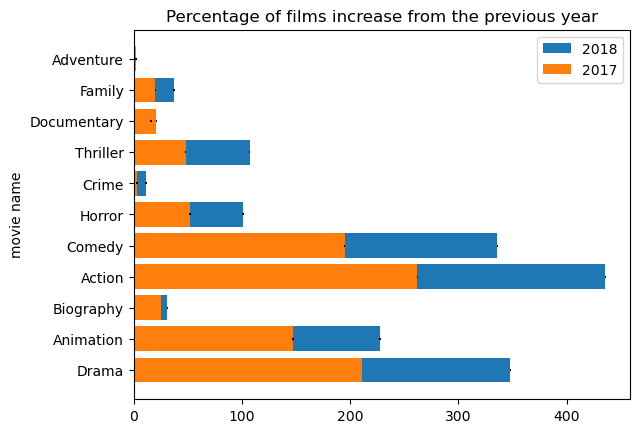

In [210]:
labels = list(movie_type_and_number_2018.keys())
movie_type_and_number_2017_lest = list(movie_type_and_number_2017.values())
movie_type_and_number_2018_lest = list(movie_type_and_number_2018.values())

width = 0.35       
fig, ax = plt.subplots()

y_pos = np.arange(len(labels))
performance = 3 + 10 * np.random.rand(len(labels))
error = np.random.rand(len(labels))

ax.barh(y_pos, movie_type_and_number_2017_lest, xerr=error, align='center',label='2018')
ax.barh(y_pos, movie_type_and_number_2018_lest, xerr=error, align='center',label='2017')
ax.set_yticks(y_pos, labels=labels)


ax.set_ylabel('movie name')
ax.set_title('Percentage of films increase from the previous year')
ax.legend()
plt.show()

In [211]:
report=ProfileReport(STC_file,title='explore STC JAWWY TV data')

TypeError: 'module' object is not callable